In [4]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [5]:
df = pd.read_csv('cubic_zirconia.csv')

In [6]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [7]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [8]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [9]:
df.shape

(26967, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [12]:
lr_df = df.drop('Unnamed: 0', axis=1)

In [13]:
lr_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [14]:
lr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [15]:
lr_df.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [16]:
print("Number of rows with x == 0: {} ".format((lr_df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((lr_df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((lr_df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((lr_df.depth==0).sum()))


Number of rows with x == 0: 3 
Number of rows with y == 0: 3 
Number of rows with z == 0: 9 
Number of rows with depth == 0: 0 


In [17]:
lr_df.shape

(26967, 10)

In [18]:
lr_df = lr_df.drop(lr_df[lr_df["x"]==0].index)
lr_df = lr_df.drop(lr_df[lr_df["y"]==0].index)
lr_df = lr_df.drop(lr_df[lr_df["z"]==0].index)
lr_df.shape

(26958, 10)

In [19]:
# Observation-2: .On the given data set the the mean and median values does not have much differenc. .We can observe Min value of "x", "y", & "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we need to filter out those as it clearly faulty data entries. .There are three object data type 'cut', 'color' and 'clarity'.

In [20]:
#EDA-Step-1: Checking for duplicate records in the data.

In [21]:
dups = lr_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(lr_df.shape)

Number of duplicate rows = 33
(26958, 10)


In [22]:
print('Before',lr_df.shape)
lr_df.drop_duplicates(inplace=True) 
print('After',lr_df.shape)

Before (26958, 10)
After (26925, 10)


In [23]:
dups = lr_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [24]:
#EDA-Step 2: Checking Missing value.

In [25]:
lr_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [26]:
#Observation-3:
#we can observe there are 697 missing value in the depth column. Missing value treatment will be done in section 1.2.

In [27]:
#EDA-Step 3 : Outlier Checks.

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


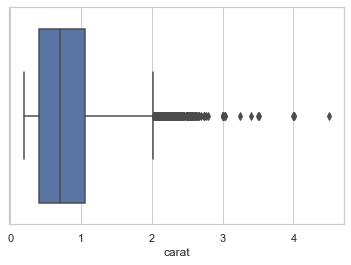

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


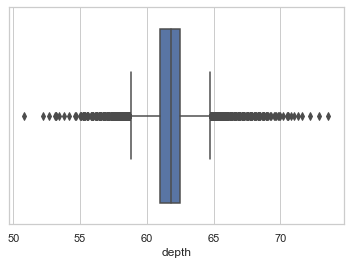

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


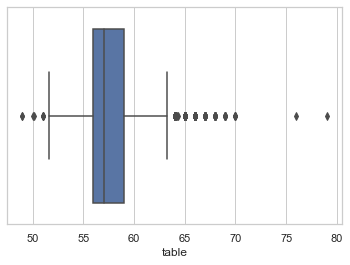

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


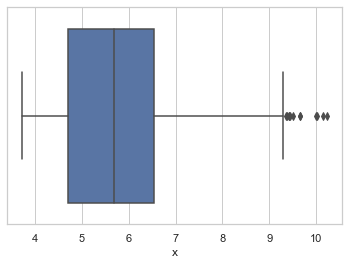

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


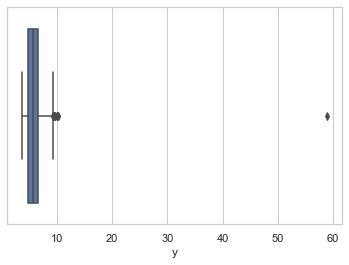

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


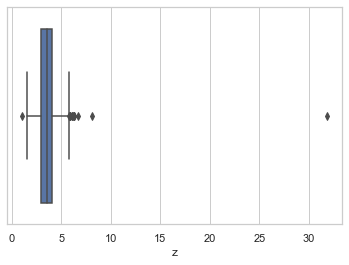

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


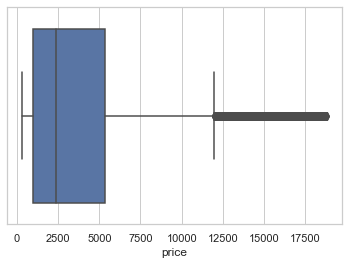

In [28]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(lr_df[i],whis=1.5)
    plt.show();

In [29]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [30]:
for column in lr_df[cols].columns:
    lr,ur=remove_outlier(lr_df[column])
    lr_df[column]=np.where(lr_df[column]>ur,ur,lr_df[column])
    lr_df[column]=np.where(lr_df[column]<lr,lr,lr_df[column])

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


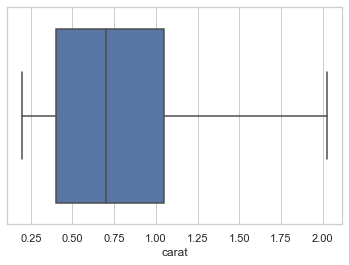

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


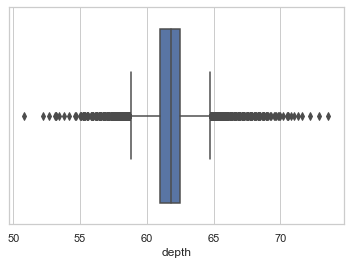

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


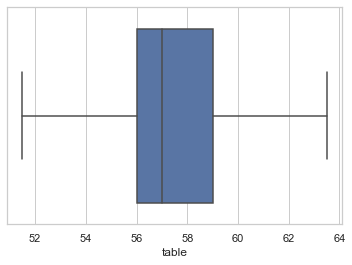

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


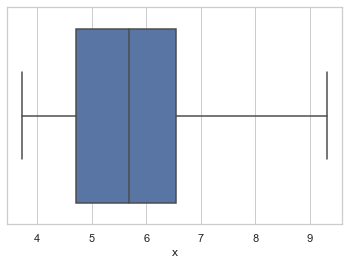

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


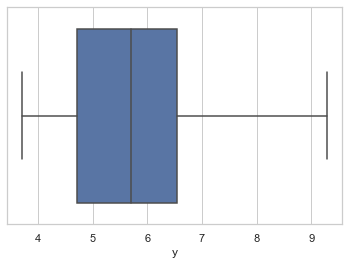

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


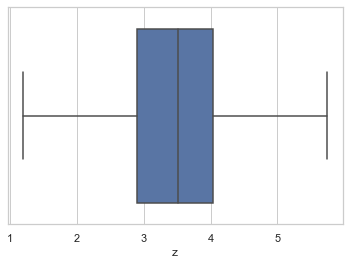

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


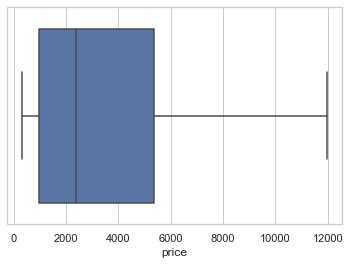

In [31]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(lr_df[i],whis=1.5)
    plt.show();

In [32]:
#EDA-Step 4 : Univariate Analysis.



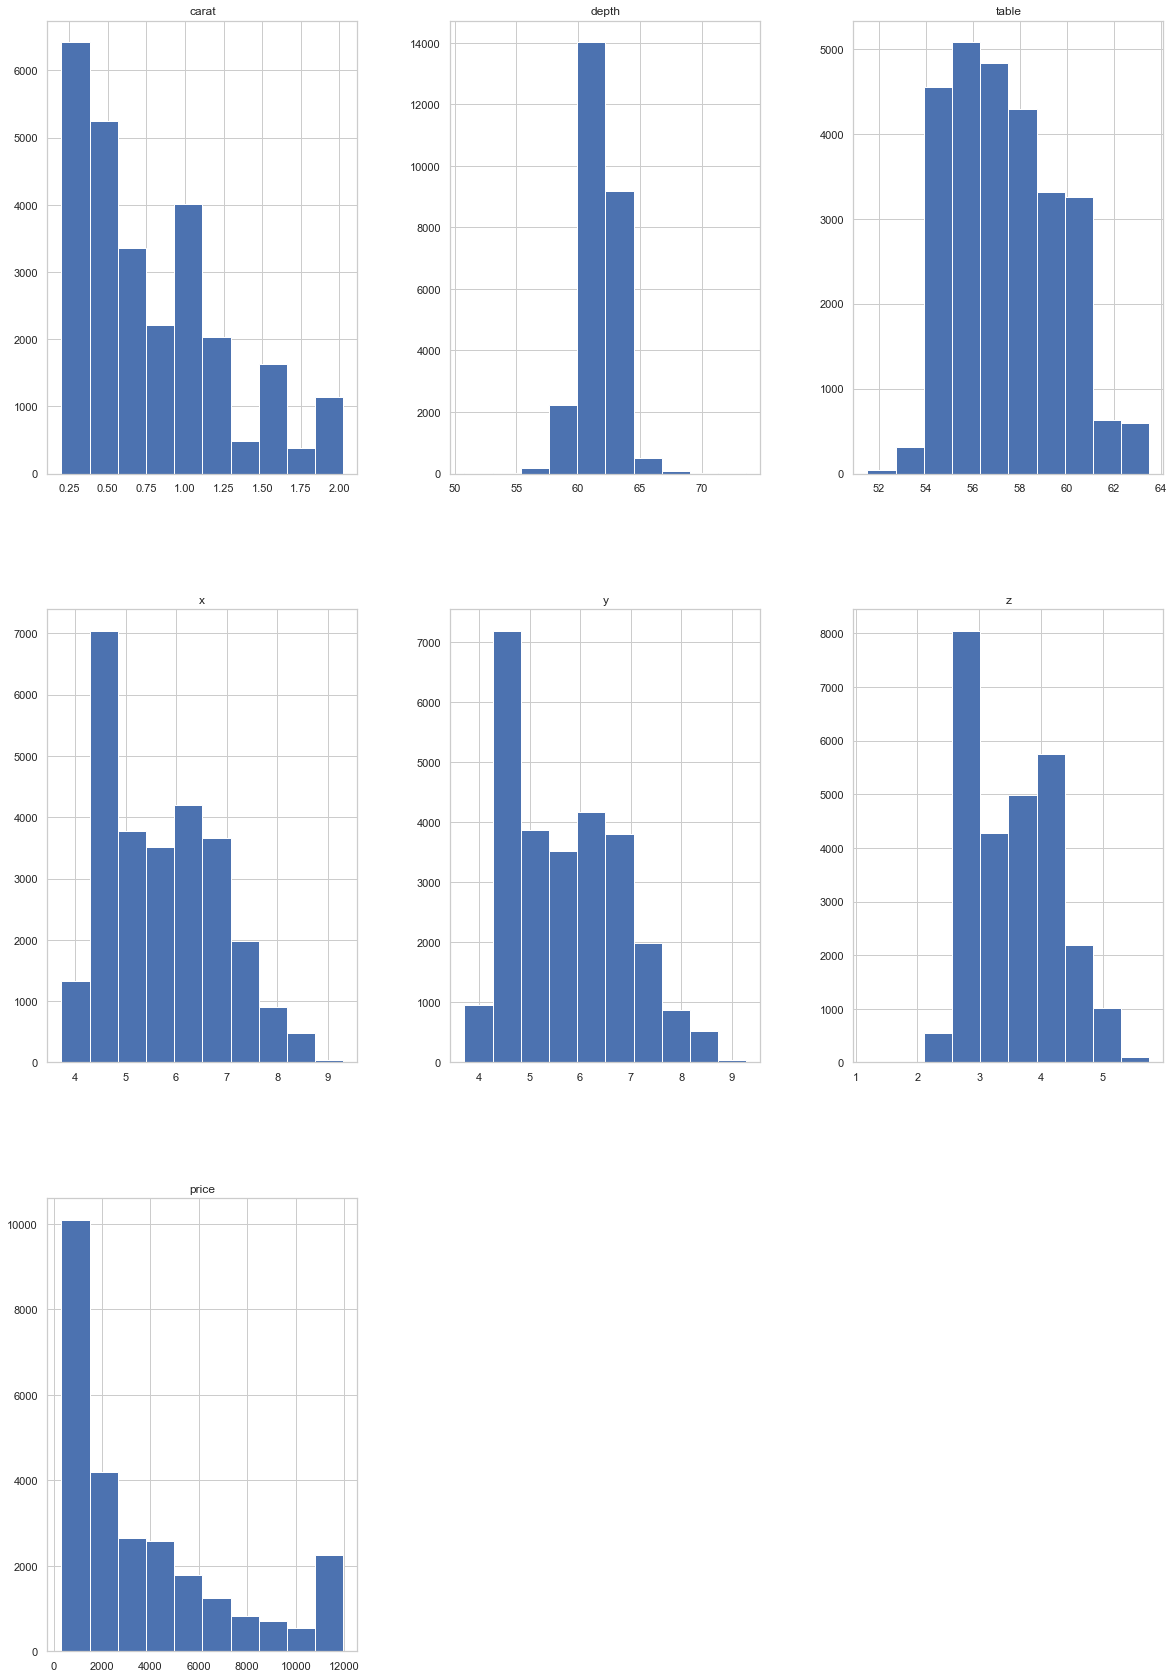

In [33]:
lr_df.hist(figsize=(20,30));

In [34]:
lr_df.skew()

carat    0.917214
depth   -0.025042
table    0.480476
x        0.397696
y        0.394060
z        0.394819
price    1.157121
dtype: float64

In [36]:
#EDA-Step 5 : Bivariate Analysis.

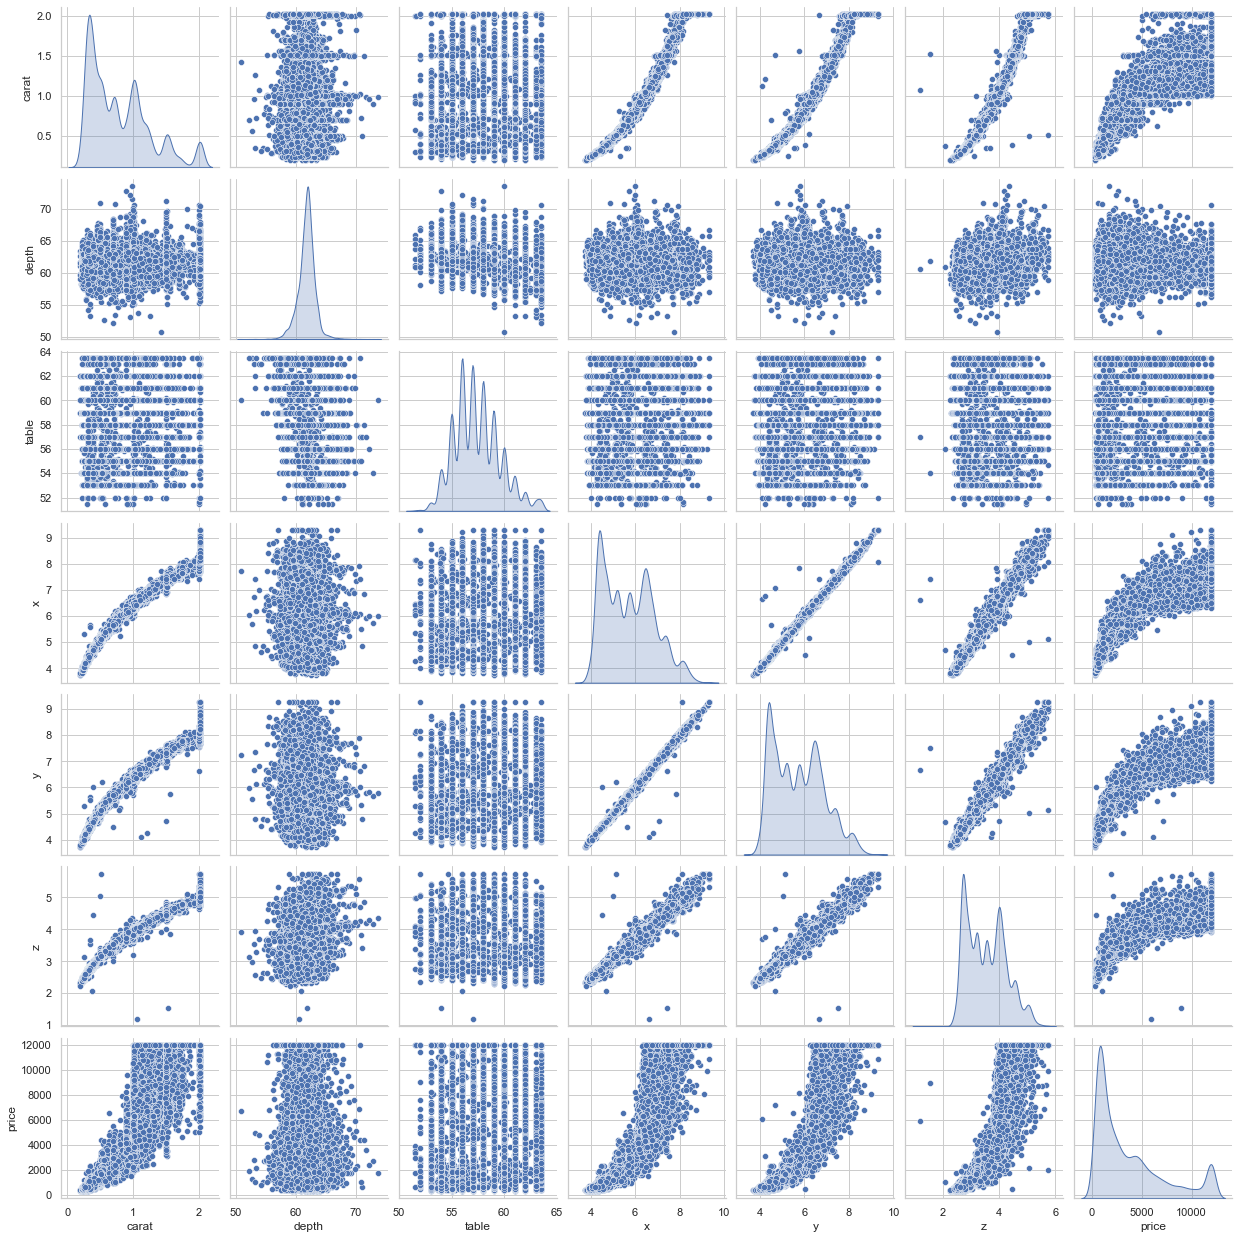

In [37]:
import seaborn as sns

df_attr = ( lr_df[cols])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

In [38]:
#Get the Correlation Heatmap

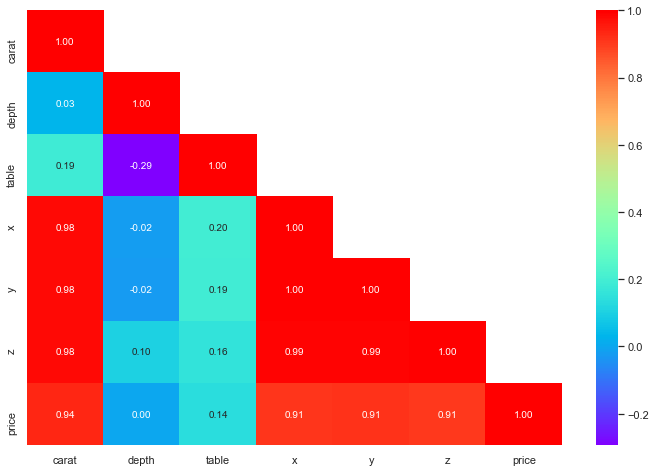

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(lr_df.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(lr_df.corr(),+1))
plt.show()

In [40]:
#How each feature affects the price of diamonds.

In [41]:
correlations = lr_df.corr()
correlations["price"].sort_values(ascending=False)

price    1.000000
carat    0.936765
y        0.914838
x        0.913409
z        0.908599
table    0.137915
depth    0.000313
Name: price, dtype: float64

In [42]:
#Observation-5:
#It can be inferred that most features correlate with the price of Diamond. The notable exception is "depth" which has a negligible correlation (<1%).

In [43]:
#EDA for Categorical variable

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


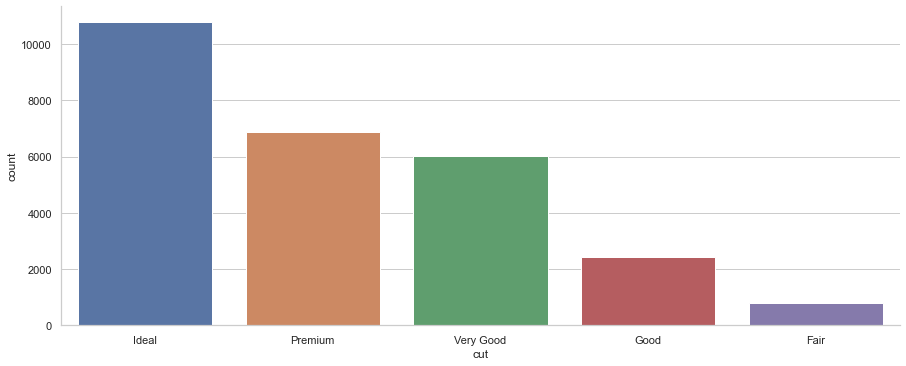

In [44]:
# EDA for categorical columns 'CUT'.
sns.catplot('cut', data=lr_df, kind='count',aspect=2.5)

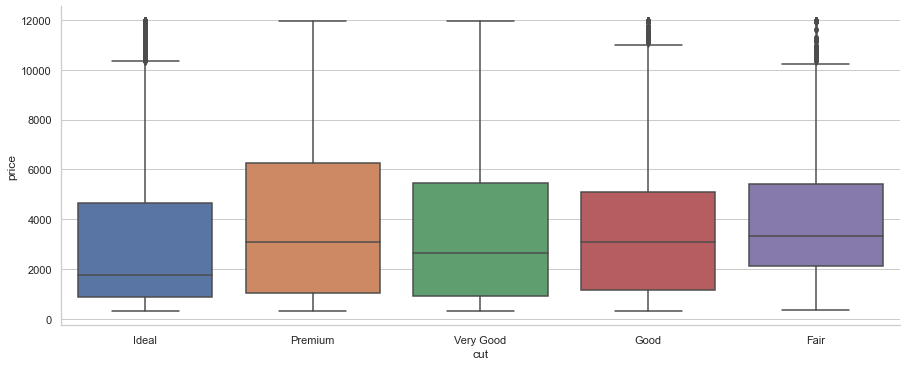

In [45]:
sns.catplot(x='cut', y='price', kind='box', data=lr_df, aspect=2.5)

In [46]:
# observation on 'CUT': The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


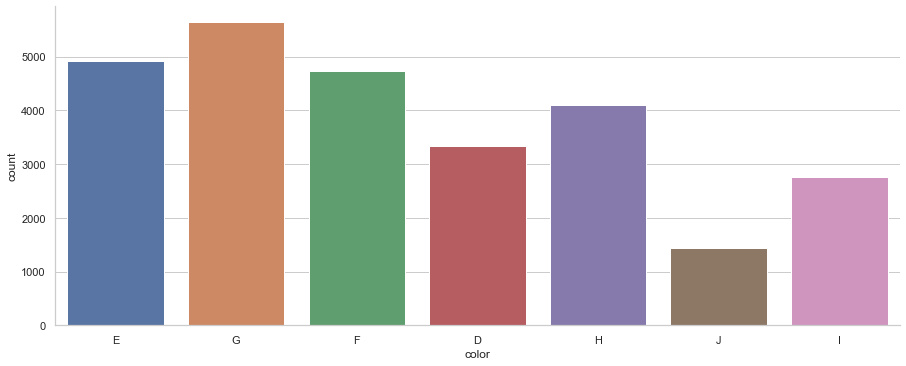

In [47]:
# EDA for categorical columns 'Color'.
sns.catplot('color', kind='count', data=lr_df, aspect=2.5)

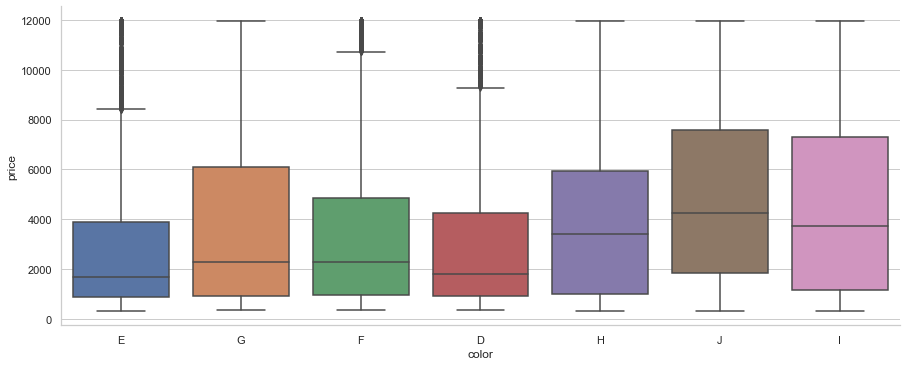

In [48]:
sns.catplot(x='color', y='price', data=lr_df, aspect =2.5, kind='box')

C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


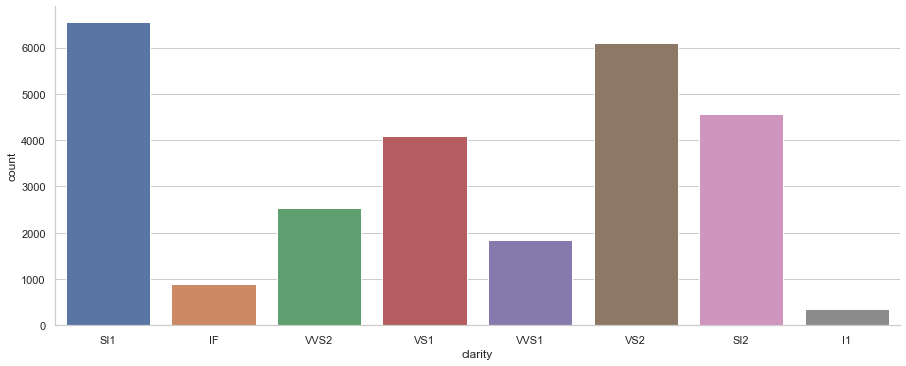

In [49]:
# EDA for categorical columns 'Clarity'.
sns.catplot('clarity', data=lr_df, kind='count',aspect=2.5)

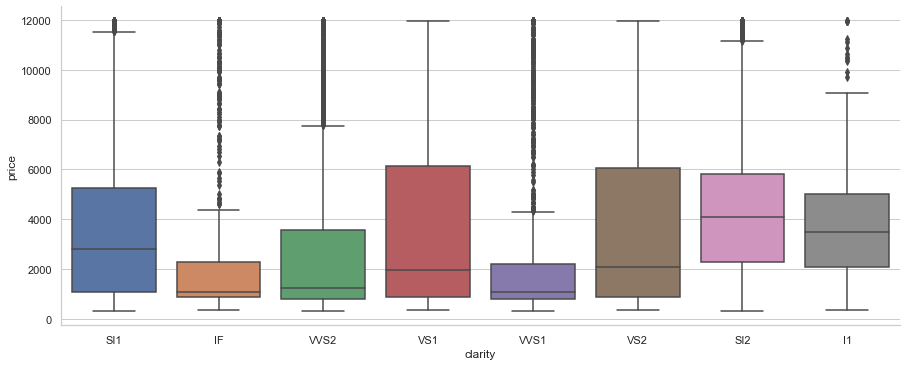

In [50]:
sns.catplot(x='clarity', y='price', data=lr_df, aspect =2.5, kind='box')

In [52]:
#1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [53]:
lr_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [54]:
lr_df.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2373.00
dtype: float64

In [55]:
#Imputing missing values
#lets replace the missing values with median value. 
lr_df = lr_df.fillna(lr_df.median())

In [56]:
lr_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [58]:
lr_df.shape

(26925, 10)

In [61]:
print('cut\n',lr_df.cut.value_counts())
print('\n')
print('color\n',lr_df.color.value_counts())
print('\n')
print('clarity\n',lr_df.clarity.value_counts())
print('\n')

cut
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


color
 G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
 SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64




In [62]:
lr_df['cut']=np.where(lr_df['cut'] =='Ideal', '4', lr_df['cut'])
lr_df['cut']=np.where(lr_df['cut'] =='Premium', '3', lr_df['cut'])
lr_df['cut']=np.where(lr_df['cut'] =='Very Good', '2', lr_df['cut'])
lr_df['cut']=np.where(lr_df['cut'] =='Good', '1', lr_df['cut'])
lr_df['cut']=np.where(lr_df['cut'] =='Fair', '0', lr_df['cut'])

In [63]:
lr_df['color']=np.where(lr_df['color'] =='D', '6', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='E', '5', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='F', '4', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='G', '3', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='H', '2', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='I', '1', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='J', '0', lr_df['color'])

In [64]:
lr_df['clarity']=np.where(lr_df['clarity'] =='IF', '7', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='VVS1', '6', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='VVS2', '5', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='VS1', '4', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='VS2', '3', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='SI1', '2', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='SI2', '1', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='I1', '0', lr_df['clarity'])

In [65]:
lr_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [66]:
# converting the'cut','color','clarity' column from object / string type to float.

lr_df['cut'] = lr_df['cut'].astype('float64')
lr_df['color'] = lr_df['color'].astype('float64')
lr_df['clarity'] = lr_df['clarity'].astype('float64')

In [67]:
lr_df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [68]:
lr_df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0
5,1.02,4.0,6.0,3.0,61.5,56.0,6.46,6.49,3.99,9502.0
6,1.01,1.0,2.0,2.0,63.7,60.0,6.35,6.30,4.03,4836.0
7,0.50,3.0,5.0,2.0,61.5,62.0,5.09,5.06,3.12,1415.0
8,1.21,1.0,2.0,2.0,63.8,63.5,6.72,6.63,4.26,5407.0
9,0.35,4.0,4.0,3.0,60.5,57.0,4.52,4.60,2.76,706.0


In [69]:
#Train-Test Split:
# Copy all the predictor variables into X dataframe
X = lr_df.drop('price', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = lr_df[['price']]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [70]:


from sklearn.model_selection import train_test_split

In [71]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [72]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8901.941225070872
The coefficient for cut is 109.1881248514942
The coefficient for color is 272.9213296449036
The coefficient for clarity is 436.44110421549226
The coefficient for depth is 8.23697179161494
The coefficient for table is -17.34517038436951
The coefficient for x is -1417.9089304449517
The coefficient for y is 1464.8272701468136
The coefficient for z is -711.2250326814099


In [75]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3171.95044730765


In [77]:
 # R square on training data
regression_model.score(X_train, y_train)

0.9311935886926559

In [78]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

# R square on testing data
regression_model.score(X_test, y_test)

0.931543712584074

In [80]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

907.1312415459145

In [81]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

911.8447345328436

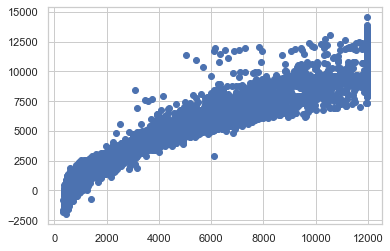

In [82]:

y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)

In [84]:
#Applying zscore statsmodels
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [85]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [86]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1837737061779512
The coefficient for cut is 0.035125000655296806
The coefficient for color is 0.13449269287641546
The coefficient for clarity is 0.20809779325621952
The coefficient for depth is 0.00332629371883908
The coefficient for table is -0.010815851633643417
The coefficient for x is -0.45968984241252925
The coefficient for y is 0.47166270917924447
The coefficient for z is -0.14249737973827192


In [87]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -5.879615251304761e-16


In [90]:
#Check Multi-collinearity using VIF

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [93]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 121.96543302739589
cut ---> 10.388738909800345
color ---> 5.546407587131623
clarity ---> 5.455999699082339
depth ---> 1218.3824913329145
table ---> 878.3985698779234
x ---> 10744.05623520385
y ---> 9482.053091580401
z ---> 3697.5688286012546


In [96]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1.0,5.0,1.0,63.3,56.0,6.53,6.58,4.15,4065.0
12108,1.01,2.0,6.0,1.0,64.0,56.0,6.30,6.38,4.06,5166.0
20181,0.67,1.0,1.0,3.0,60.7,61.4,5.60,5.64,3.41,1708.0
4712,0.76,1.0,3.0,2.0,57.7,63.0,6.05,5.97,3.47,2447.0
2548,1.01,3.0,3.0,4.0,62.8,59.0,6.37,6.34,3.99,6618.0


In [97]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept   -3171.950447
carat        8901.941225
cut           109.188125
color         272.921330
clarity       436.441104
depth           8.236972
table         -17.345170
x           -1417.908930
y            1464.827270
z            -711.225033
dtype: float64

In [98]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.833e+04
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:44:52   Log-Likelihood:            -1.5510e+05
No. Observations:               18847   AIC:                         3.102e+05
Df Residuals:                   18837   BIC:                         3.103e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3171.9504    787.532     -4.028      0.0

In [100]:
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [101]:
mse1 = np.mean((lm1.predict(data_test.drop('price',axis=1))-data_test['price'])**2)

In [102]:
np.sqrt(mse)

907.1312415459137

In [103]:
np.sqrt(mse1)

911.8447345328425

In [104]:
y_pred = lm1.predict(data_test)

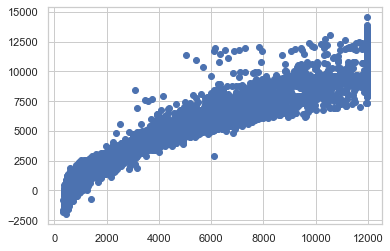

In [105]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [106]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-3171.95) * Intercept + (8901.94) * carat + (109.19) * cut + (272.92) * color + (436.44) * clarity + (8.24) * depth + (-17.35) * table + (-1417.91) * x + (1464.83) * y + (-711.23) * z + 

In [7]:
# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. 
#Do exploratory data analysis.
#Importing all the necessary libraries
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
#Loading data in data frame
df_hp= pd.read_csv('Holiday_Package.csv')

In [9]:
df_hp.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [10]:
df_hp.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [11]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [12]:
#Checking shape of the data
df_hp.shape


(872, 8)

In [13]:
#Getting data Discription
# Data Description
df_hp.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,436.500000,251.869014,1.0,218.75,436.5,654.25,872.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.00,41903.5,53469.50,236961.0
age,872.0,39.955275,10.551675,20.0,32.00,39.0,48.00,62.0
educ,872.0,9.307339,3.036259,1.0,8.00,9.0,12.00,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.00,0.0,0.00,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.00,1.0,2.00,6.0


In [14]:

#Checking Null Values
df_hp.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [15]:
#Checking for Duplicate Data
dups_hp= df_hp.duplicated()
print('Number of duplicate Rows = %d' % (dups_hp.sum()))
df_hp[dups_hp]

Number of duplicate Rows = 0


,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [ ]:
#No duplicate data found

#Getting unique values of all the categorical variables

In [16]:
print('Holliday_Package',': ',df_hp['Holliday_Package'].nunique())
print(df_hp['Holliday_Package'].value_counts().sort_values())
print(' ')
print('foreign',':',df_hp['foreign'].nunique())
print(df_hp['foreign'].value_counts().sort_values())

Holliday_Package :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64
 
foreign : 2
yes    216
no     656
Name: foreign, dtype: int64


In [17]:
#Univariate / Bivariate Analysis
df_hp.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,NaN,NaN,NaN,436.5,251.869014,1.0,218.75,436.5,654.25,872.0
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [19]:
# Creating DataFrame of Continuous variables
num_df_hp= df_hp[['Salary','age','educ','no_young_children','no_older_children']]
num_df_hp.head()

,Salary,age,educ,no_young_children,no_older_children
0,48412,30,8,1,1
1,37207,45,8,0,1
2,58022,46,9,0,0
3,66503,31,11,2,0
4,66734,44,12,0,2


In [20]:
def univariateanalysis_numaric(column,nbins):
    print("Description of " + column)
    print('...........................................................')
    print(num_df_hp[column].describe(),end=' ')
    print(' ')
    
    plt.figure()
    print("Distribution of " + column)
    print('...........................................................')
    sns.distplot(num_df_hp[column],kde=False,color='g');
    plt.show()
    
    plt.figure()
    print("Boxplot of " + column)
    print('...........................................................')
    sns.boxplot(x=num_df_hp[column])
    plt.show()

In [21]:
lstnumariccolumns= list(num_df_hp.columns.values)
len(lstnumariccolumns)

5

Description of Salary
...........................................................
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64  
Distribution of Salary
...........................................................


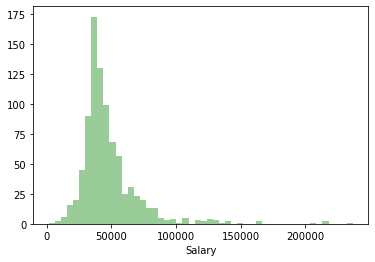

Boxplot of Salary
...........................................................


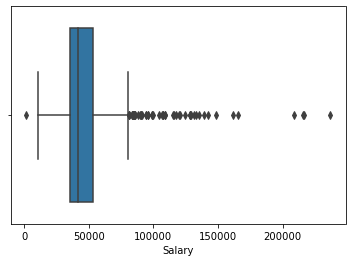

Description of age
...........................................................
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64  
Distribution of age
...........................................................


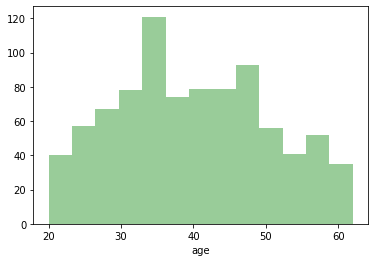

Boxplot of age
...........................................................


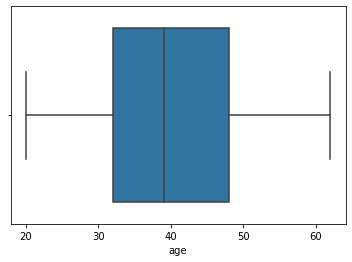

Description of educ
...........................................................
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64  
Distribution of educ
...........................................................


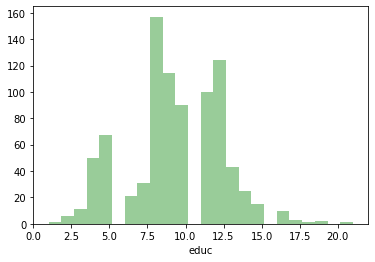

Boxplot of educ
...........................................................


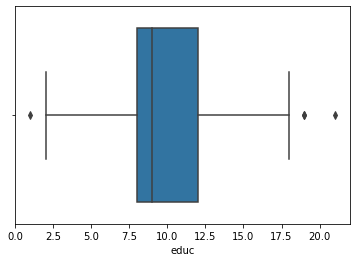

Description of no_young_children
...........................................................
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64  
Distribution of no_young_children
...........................................................


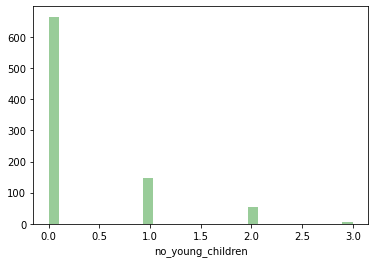

Boxplot of no_young_children
...........................................................


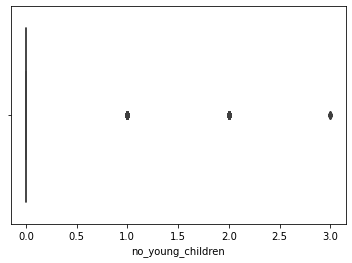

Description of no_older_children
...........................................................
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64  
Distribution of no_older_children
...........................................................


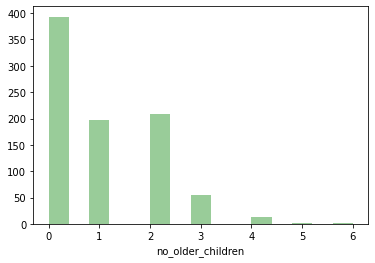

Boxplot of no_older_children
...........................................................


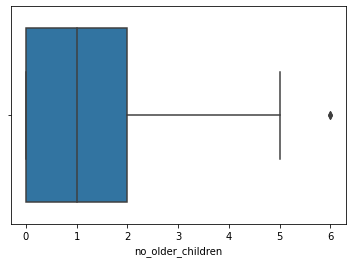

In [22]:
for x in lstnumariccolumns:
    univariateanalysis_numaric(x,20)

In [23]:
#Checking skewness
# Let's check the skewness values quantitatively
df_hp.skew().sort_values(ascending=False)

Salary               3.103216
no_young_children    1.946515
no_older_children    0.953951
age                  0.146412
Unnamed: 0           0.000000
educ                -0.045501
dtype: float64

In [ ]:
#Bivariate Analysis
#Categorical Variable

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

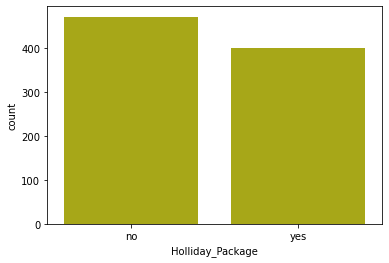

In [24]:
sns.countplot(x='Holliday_Package',data=df_hp,color='y')

<AxesSubplot:xlabel='foreign', ylabel='count'>

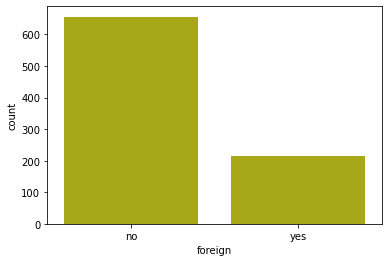

In [25]:
sns.countplot(x='foreign',data=df_hp,color="y")


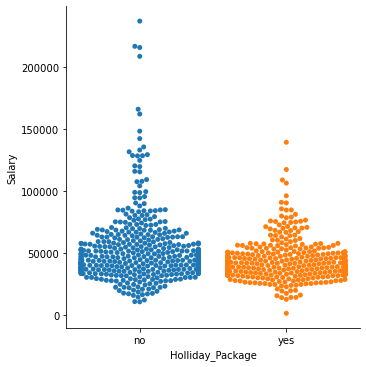

In [26]:
sns.catplot(x='Holliday_Package',y='Salary',kind='swarm',data=df_hp)

In [ ]:
#Observation:

#We can see employees below salary 150000 have always opted for holiday package.

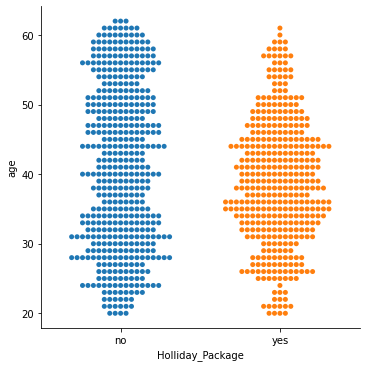

In [28]:
sns.catplot(x='Holliday_Package',y='age',kind='swarm',data=df_hp)

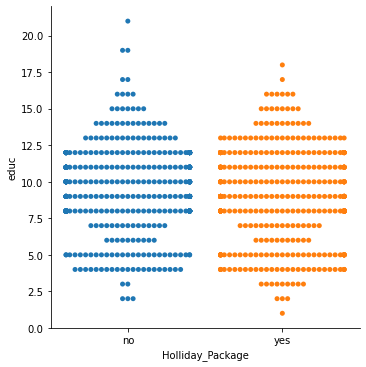

In [29]:
sns.catplot(x='Holliday_Package',y='educ',kind='swarm',data=df_hp)


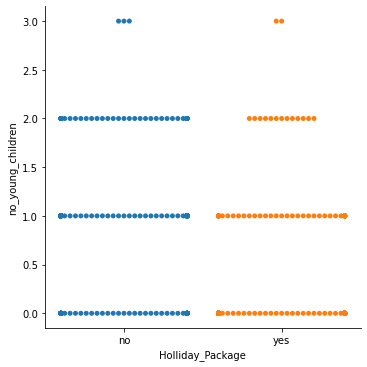

In [30]:
sns.catplot(x='Holliday_Package',y='no_young_children',kind='swarm',data=df_hp)

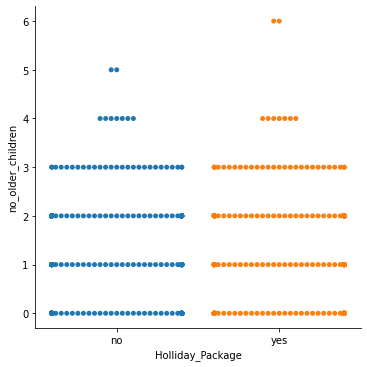

In [31]:
sns.catplot(x='Holliday_Package',y='no_older_children',kind='swarm',data=df_hp)

<AxesSubplot:xlabel='age', ylabel='Salary'>

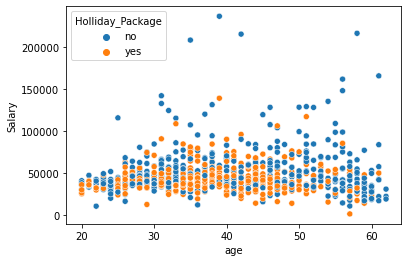

In [32]:
sns.scatterplot(x='age',y='Salary',hue='Holliday_Package',data=df_hp)

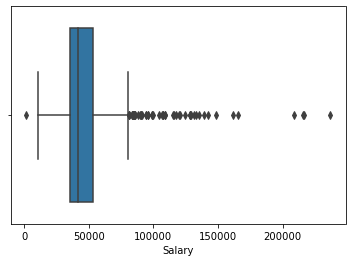

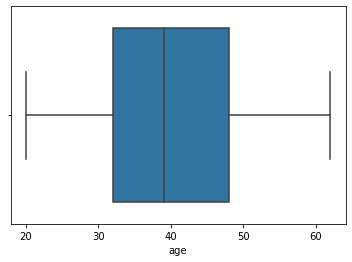

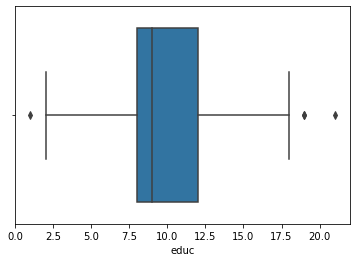

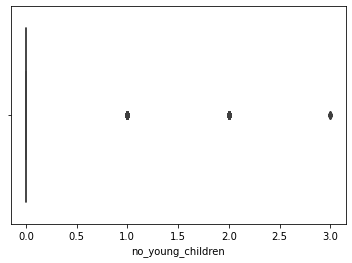

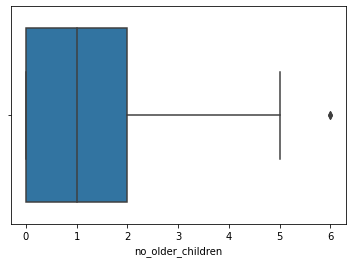

In [33]:
for i in num_df_hp:
    sns.boxplot(num_df_hp[i])
    plt.show()

In [34]:
#Bivariate Analysis
#Data Distribution

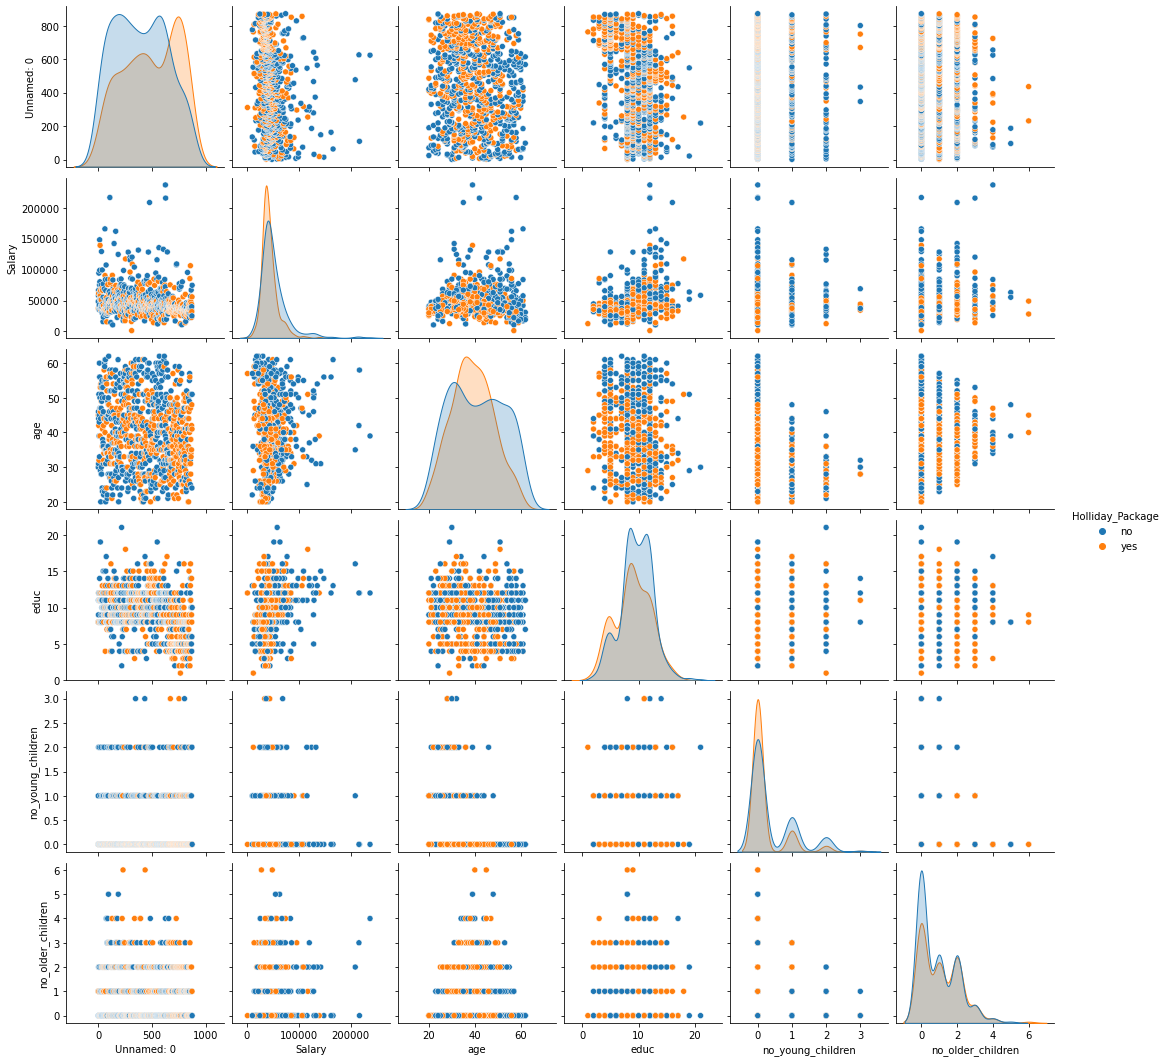

In [35]:
sns.pairplot(df_hp,diag_kind='kde',hue='Holliday_Package')

<AxesSubplot:>

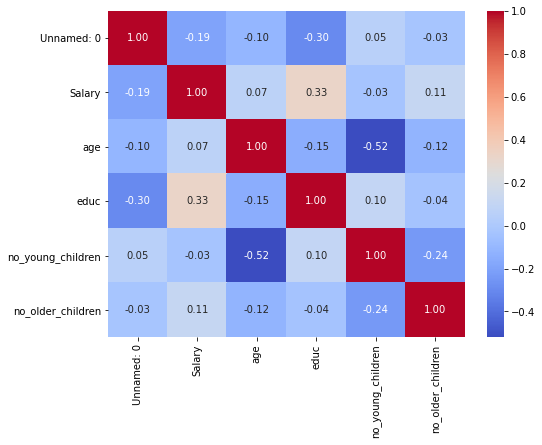

In [36]:

df_hp_cor=df_hp.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_hp_cor,annot=True,fmt='.2f',cmap='coolwarm')

In [ ]:
#No multi collinearity in the data

In [ ]:
#Treating Outliers
#we have outliers in the dataset, as LDA works based on numerical computation treating outliers will help perform the model better

In [37]:
cont1 = df_hp.dtypes[(df_hp.dtypes!='uint8')&(df_hp.dtypes!='object')].index
def remove_outlier(col):
    sorted(col)
    Q1,Q3= np.percentile(col,[25,75])
    IQR= Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range, upper_range

In [ ]:
for column in df_hp[cont1].columns:
    lr,ur=remove_outlier(df_hp[column])
    df_hp[column]=np.where(df_hp[column]>ur,ur,df_hp[column])
    df_hp[column]=np.where(df_hp[column]<lr,lr,df_hp[column])

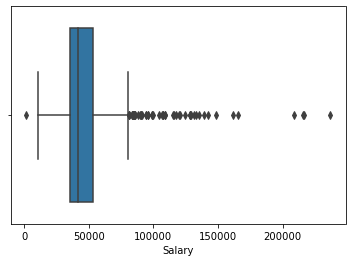

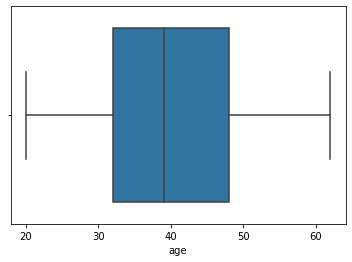

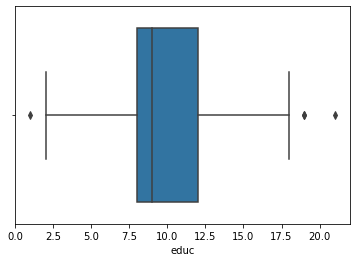

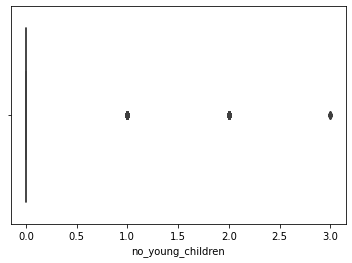

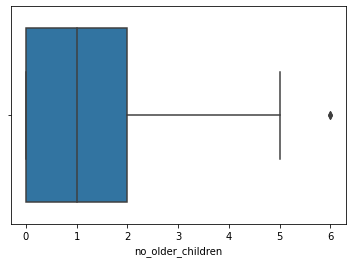

In [38]:
cols1= ["Salary",'age','educ','no_young_children','no_older_children']

for i in cols1:
    sns.boxplot(df_hp[i])
    plt.show()


In [ ]:
#Observation :

#No outliers in the data, all the outliers have been treated.


In [39]:
df_hp.head()


,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [40]:
# Droping the 'Unnamed: 0' column as it is useless for the model
df_hp1= df_hp.drop(columns=['Unnamed: 0'],axis=1)

In [41]:
df_hp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [ ]:
#as we can see column 'Unnamed: 0' is dropped successfuly

In [ ]:
#Question 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [42]:
# converting categorical variable in to dummy variable in data1

data1= pd.get_dummies(df_hp1,columns=['Holliday_Package','foreign'],drop_first=True)

In [43]:
data1.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


In [44]:
data1.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'Holliday_Package_yes', 'foreign_yes'],
      dtype='object')

In [45]:
#Train / Test split


In [46]:
# copy all the predictor variables into x dataframe.
x= data1.drop('Holliday_Package_yes',axis=1)

# Copy target variable into Y dataframe.
Y= data1['Holliday_Package_yes']


In [47]:
# split x and Y into training and test set in 70:30 ratio
x_train,x_test,Y_train,Y_test= train_test_split(x,Y,test_size=0.30,random_state=1,stratify=Y)

In [48]:
Y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

In [49]:
# Fit the model on the data
model2 = LogisticRegression(solver= 'newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model2.fit(x_train,Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [50]:
#Prediction on training set

In [51]:
Y_train_predict = model2.predict(x_train)
Y_test_predict = model2.predict(x_test)

In [52]:
#Getting probabilties on test set

In [53]:
Y_test_predict_prob=model2.predict_proba(x_test)
pd.DataFrame(Y_test_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697042,0.302958
3,0.496348,0.503652
4,0.557723,0.442277


In [54]:
Y_train_predict

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

[[244  85]
 [118 163]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



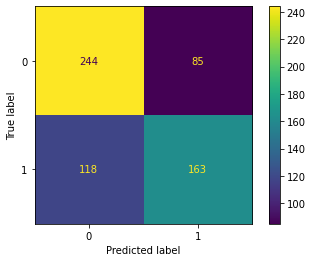

In [55]:
#Confusion Matrix on training data
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, Y_train_predict))
plot_confusion_matrix(model2,x_train,Y_train)

[[109  33]
 [ 58  62]]
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



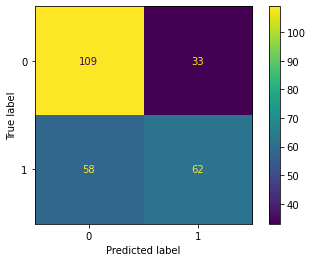

In [56]:
#Confusion Matrix on testing data
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))
plot_confusion_matrix(model2,x_test,Y_test)


In [57]:
#Accuracy - training data
lr_train_acc= model2.score(x_train,Y_train)
lr_train_acc

0.6672131147540984

AUC: 0.735


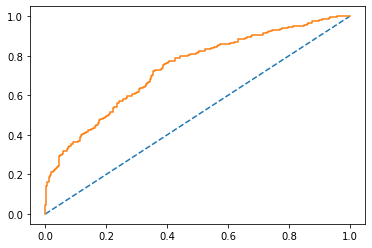

In [58]:
#AUC and ROC for the training data
# Predict probabilities.
probs= model2.predict_proba(x_train)
# Keep probabilities for the positive outcome only
probs=probs[:,1]
# Calculate AUC.
lr_train_auc= roc_auc_score(Y_train,probs)
print('AUC: %.3f' % lr_train_auc)
# Calculate roc curve.
train_fpr, train_tpr, train_thresholds= roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
# Plot the roc curve for the model.
plt.plot(train_fpr,train_tpr);

In [59]:
#Accuracy - test data
lr_test_acc= model2.score(x_test,Y_test)
lr_test_acc

0.6526717557251909

AUC: 0.717


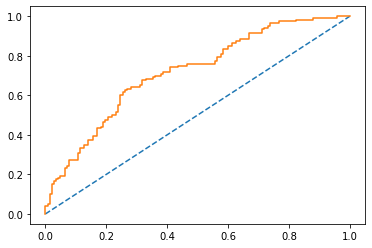

In [60]:
# Predict probabilities.
probs= model2.predict_proba(x_test)
# Keep probabilities for the positive outcome only
probs= probs[:,1]
# Calculate AUC.
lr_test_auc= roc_auc_score(Y_test,probs)
print('AUC: %.3f' % lr_test_auc)
# Calculate roc curve.
test_fpr, test_tpr, test_thresholds= roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
# Plot the roc curve for the model.
plt.plot(test_fpr,test_tpr);

In [61]:
lr_metrics=classification_report(Y_train, Y_train_predict,output_dict=True)
df_lr=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df_lr.loc["1"][2],2)
lr_train_recall=round(df_lr.loc["1"][1],2)
lr_train_precision=round(df_lr.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.66
lr_train_recall  0.58
lr_train_f1  0.62


In [62]:
lr_metrics=classification_report(Y_test, Y_test_predict,output_dict=True)
df_lr=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df_lr.loc["1"][2],2)
lr_test_recall=round(df_lr.loc["1"][1],2)
lr_test_precision=round(df_lr.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.65
lr_test_recall  0.52
lr_test_f1  0.58


In [63]:
#LDA Model
# Coppying the original dataframe.
df_hp2= df_hp1.copy()

In [64]:
df_hp1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [65]:
df_hp1.shape

(872, 7)

In [66]:
df_hp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [67]:
for feature in df_hp1.columns: 
    if df_hp1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_hp1[feature].unique()))
        print(pd.Categorical(df_hp1[feature].unique()).codes)
        df_hp1[feature] = pd.Categorical(df_hp1[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


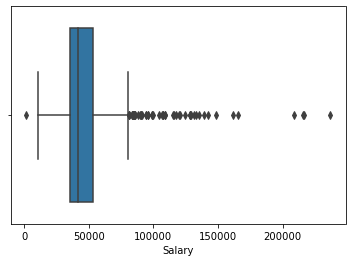

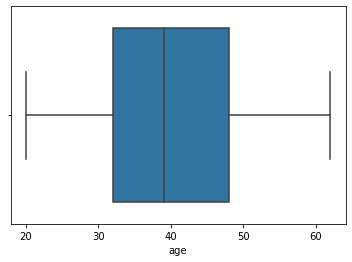

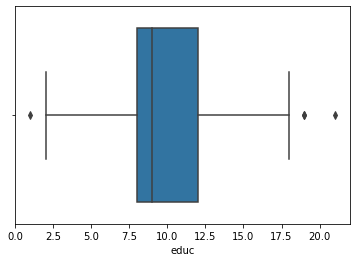

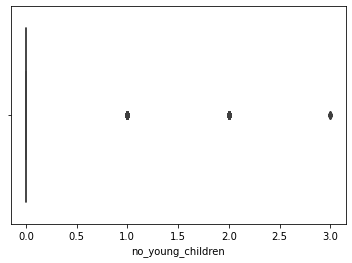

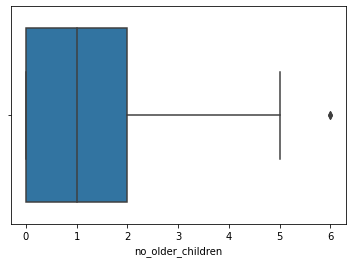

In [68]:
### Checking for outliers once again before proceeding
cols= ['Salary','age','educ','no_young_children','no_older_children']

for i in cols:
    sns.boxplot(df_hp1[i])
    plt.show()

In [69]:
X = df_hp1.drop('Holliday_Package',axis=1)
Y = df_hp1.pop('Holliday_Package')

In [70]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

In [71]:
Y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [72]:
#Building LDA model
clf= LinearDiscriminantAnalysis()
model= clf.fit(X_train,Y_train)


In [73]:
#Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

In [74]:
#Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [75]:
pred_class_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

In [76]:
#Training Data Probability Prediction


In [77]:
pred_prob_train = model.predict_proba(X_train)

In [78]:
#Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [79]:
#Checking train model Score
lda_train_acc = model.score(X_train,Y_train)
lda_train_acc
0.6327868852459017

0.6327868852459017

In [81]:
# Creating Confusion Matrix
confusion_matrix(Y_train, pred_class_train)

#Classification report train data
print(classification_report(Y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



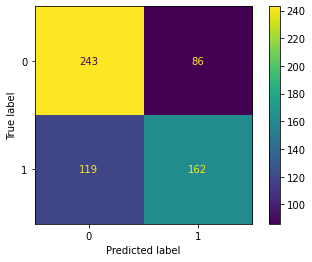

In [82]:
plot_confusion_matrix(model,X_train,Y_train)


In [83]:
#Checking test model Score
lda_test_acc = model.score(X_test,Y_test)
lda_test_acc

0.6412213740458015

In [84]:
# Creating Confusion matrix
confusion_matrix(Y_test, pred_class_test)


array([[109,  33],
       [ 61,  59]], dtype=int64)

In [85]:
#Classification report test data

In [86]:
print(classification_report(Y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262



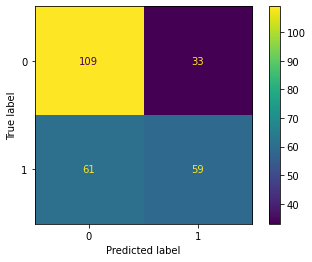

In [87]:
plot_confusion_matrix(model,X_test,Y_test)

In [88]:
#Changing the cutt off value to check optimal value that gives better Accuracy and F1 Score.

0.1 

Accuracy Score 0.482
F1 Score 0.6393 

Confusion Matrix


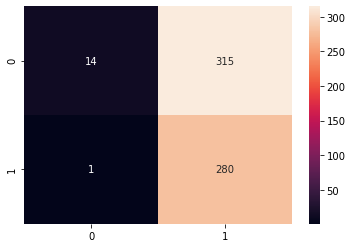

0.2 

Accuracy Score 0.5213
F1 Score 0.6499 

Confusion Matrix


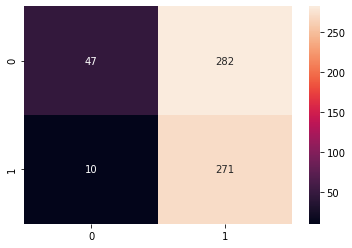

0.3 

Accuracy Score 0.5934
F1 Score 0.6693 

Confusion Matrix


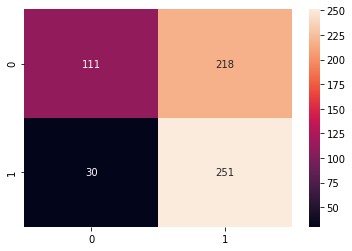

0.4 

Accuracy Score 0.6656
F1 Score 0.6762 

Confusion Matrix


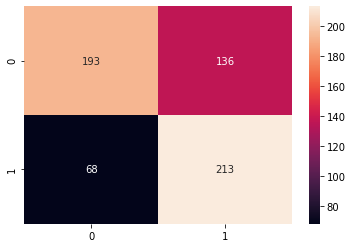

0.5 

Accuracy Score 0.6639
F1 Score 0.6125 

Confusion Matrix


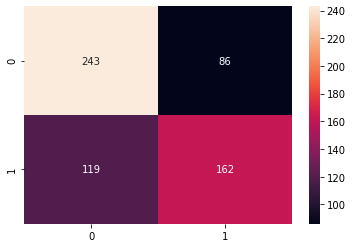

0.6 

Accuracy Score 0.659
F1 Score 0.5336 

Confusion Matrix


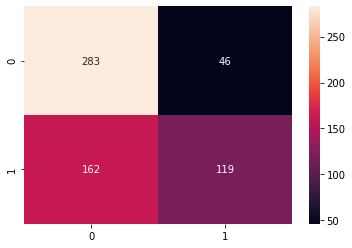

0.7 

Accuracy Score 0.6492
F1 Score 0.4398 

Confusion Matrix


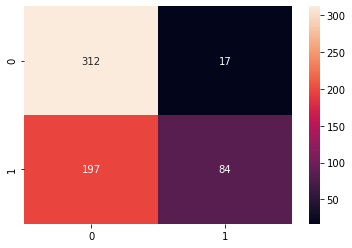

0.8 

Accuracy Score 0.5885
F1 Score 0.1981 

Confusion Matrix


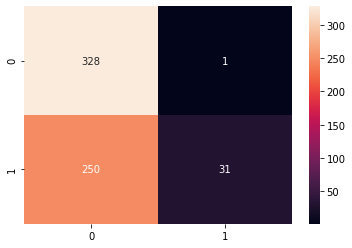

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


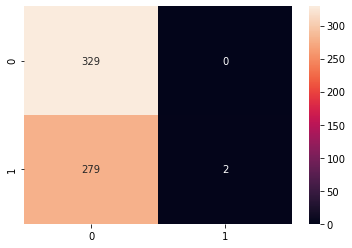

In [89]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[] #defining an empty list
    for i in range(0,len(Y_train)): #defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob: #issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1 #if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0 #if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a) #adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


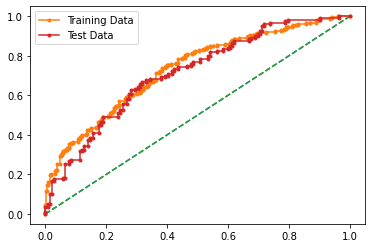

In [90]:
#AUC and ROC Curve
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show() 

In [91]:
lda_metrics=classification_report(Y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lr_train_f1)


lda_train_precision  0.65
lda_train_recall  0.58
lda_train_f1  0.62


In [92]:
lda_metrics=classification_report(Y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.64
lda_test_recall  0.49
lda_test_f1  0.56


In [93]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.67,0.65,0.66,0.64
AUC,0.74,0.72,0.73,0.71
Recall,0.58,0.52,0.58,0.49
Precision,0.66,0.65,0.65,0.64
F1 Score,0.62,0.58,0.61,0.56
